In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
        closing_prices,
        optimize_portfolio,
        backtest_portfolio
)

In [2]:
# Assets: Google, JPMorgan Chase, Walmart
stock1 = "GOOG"
stock2 = "JPM"
assets = [stock1, stock2]

In [3]:
# Optimize Portfolio Weights
portfolio = optimize_portfolio(assets, 1000)

[0] Retrieving Stock Data: GOOG
[1] Retrieving Stock Data: JPM

Optimizing Portfolio Weights >> Simulations: x 1000

Optimized Portfolio Weights:
GOOG        0.4462
JPM         0.5538
Return      0.1465
Sharpe      0.2677
Variance    0.1812
Name: 461, dtype: float64


In [8]:
# Create DataFrame of Historic Returns
performance = backtest_portfolio(portfolio)


Ticker: GOOG 	Portfolio Weight: 0.4543
                GOOG
Date                
2014-03-28  0.001243
2014-03-31 -0.002457
2014-04-01  0.008236
2014-04-02 -0.000128
2014-04-03  0.002190

Ticker: JPM 	Portfolio Weight: 0.5457
                 JPM
Date                
2014-01-03  0.004202
2014-01-06  0.003154
2014-01-07 -0.006326
2014-01-08  0.005122
2014-01-09 -0.001021

[Historic] Portfolio Performance:
                 GOOG       JPM      RTNp
Date                                    
2014-03-28  0.001243  0.001092  0.002335
2014-03-31 -0.002457  0.006056  0.003599
2014-04-01  0.008236 -0.000360  0.007877
2014-04-02 -0.000128 -0.001712 -0.001840
2014-04-03  0.002190  0.001622  0.003812


In [10]:
performance.head(10)

,GOOG,JPM,RTNp
Date,,,
2014-03-28,0.001243,0.001092,0.002335
2014-03-31,-0.002457,0.006056,0.003599
2014-04-01,0.008236,-0.000360,0.007877
2014-04-02,-0.000128,-0.001712,-0.001840
2014-04-03,0.002190,0.001622,0.003812
2014-04-04,-0.021721,-0.007701,-0.029422
2014-04-07,-0.004193,-0.007441,-0.011634
2014-04-08,0.013925,-0.001389,0.012535
2014-04-09,0.007503,0.003881,0.011383


In [15]:
print(performance["GOOG"].std())
print(performance["JPM"].std())
print(performance["RTNp"].std())

0.006456400751424038
0.007194769038973021
0.011460088305765547


In [31]:
performA = closing_prices(stock1).set_index("Date")
performB = closing_prices(stock2).set_index("Date")

In [39]:
print(performA.head())
print(performB.head())

              GOOG
Date              
2014-03-27  558.46
2014-03-28  559.99
2014-03-31  556.97
2014-04-01  567.16
2014-04-02  567.00
              JPM
Date             
2014-01-02  58.21
2014-01-03  58.66
2014-01-06  59.00
2014-01-07  58.32
2014-01-08  58.87


In [44]:
pct_returnA = performA.pct_change().iloc[1:]
pct_returnB = performB.pct_change().iloc[1:]

In [46]:
print(pct_returnA.head())
print(pct_returnB.head())
print(performance.head())

                GOOG
Date                
2014-03-28  0.002740
2014-03-31 -0.005393
2014-04-01  0.018295
2014-04-02 -0.000282
2014-04-03  0.004832
                 JPM
Date                
2014-01-03  0.007731
2014-01-06  0.005796
2014-01-07 -0.011525
2014-01-08  0.009431
2014-01-09 -0.001869
                GOOG       JPM      RTNp
Date                                    
2014-03-28  0.001243  0.001092  0.002335
2014-03-31 -0.002457  0.006056  0.003599
2014-04-01  0.008236 -0.000360  0.007877
2014-04-02 -0.000128 -0.001712 -0.001840
2014-04-03  0.002190  0.001622  0.003812


In [51]:
pct_returnA.std() * 100

GOOG    1.433674
dtype: float64

In [52]:
pct_returnB.std() * 100

JPM    1.312928
dtype: float64

In [53]:
performance["RTNp"].std() * 100

1.1460088305765548

In [24]:
performance[["GOOG", "JPM"]].corr()

,GOOG,JPM
GOOG,1.000000,0.407771
JPM,0.407771,1.000000


(-0.05, 0.05)

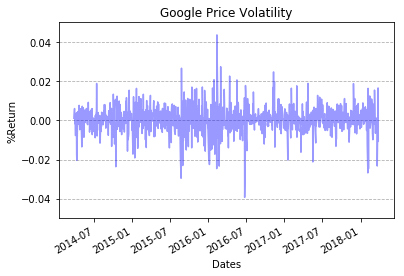

In [20]:
# [Plot] Google - Volatility of Returns (Individual)

performance["JPM"].plot(color="blue", alpha=0.4
                        )
plt.grid(axis="y", linestyle="dashed")
plt.title("Google Price Volatility")
plt.xlabel("Dates")
plt.ylabel("%Return")
plt.ylim(-0.05, 0.05)



(-0.05, 0.05)

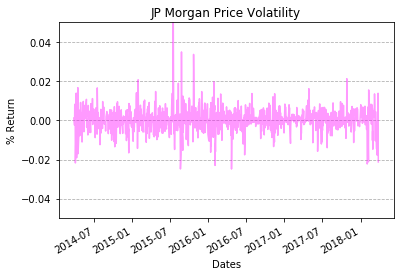

In [21]:
# [Plot] JP Morgan Volatility of Returns (Individual)

performance["GOOG"].plot(color="magenta", alpha=0.4)
plt.grid(axis="y", linestyle="dashed")
plt.title("JP Morgan Price Volatility")
plt.xlabel("Dates")
plt.ylabel("% Return")
plt.ylim(-0.05, 0.05)

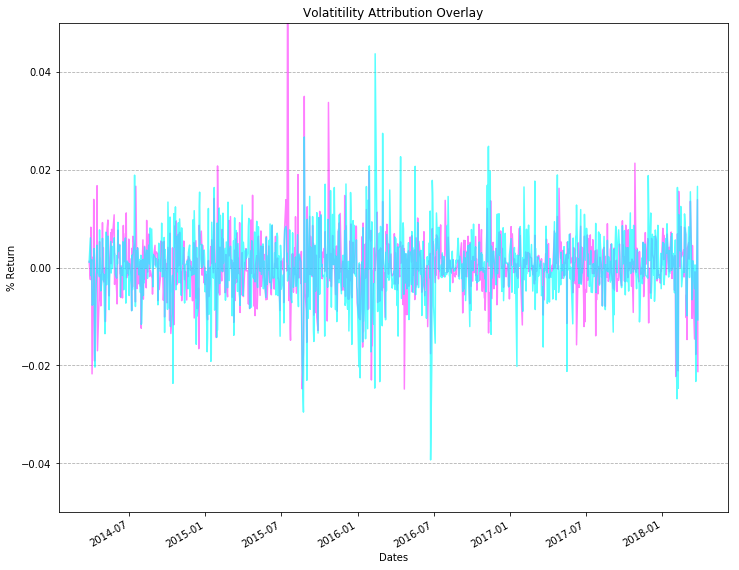

In [36]:
# [Plot] Overlay - Google & JPM Volatility of Returns (Equal Weighting)

performance["GOOG"].plot(color="magenta", alpha=0.5, figsize=(12,10))
performance["JPM"].plot(color="cyan", alpha=0.65)
#performance["RTNp"].plot(color="green", alpha=0.4)
plt.grid(axis="y", linestyle="dashed")
plt.title("Volatitility Attribution Overlay")
plt.xlabel("Dates")
plt.ylabel("% Return")
plt.ylim(-.05, .05)
plt.show()

(-0.05, 0.05)

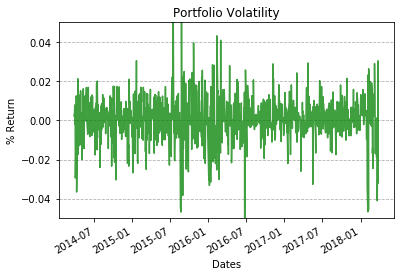

In [22]:
# [Plot] Portfolio - Weighted Portfolio Volatility (Optimized)
# (Shows that portfolio volatility is the net weighted average of the assets comprising it)

performance["RTNp"].plot(color="green", alpha=0.75)
plt.grid(axis="y", linestyle="dashed")
plt.title("Portfolio Volatility")
plt.xlabel("Dates")
plt.ylabel("% Return")
plt.ylim(-0.05, 0.05)